**Note:** This project deadline was extended by one day in return for three late days among the contributors. 

In [84]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import geopandas 
import folium
import geodatasets
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import t


mychi = pd.read_csv('../stat 303-1/My_CHI._My_Future._Programs.csv')
mcmf = pd.read_csv('../stat 303-1/My_CHI._My_Future._Programs.csv')
programs_df = pd.read_csv('../stat 303-1/My_CHI._My_Future._Programs.csv')
cps_info = pd.read_csv('../stat 303-1/CPS_info.csv')
crime_df = pd.read_csv('../stat 303-1/crimes.csv')

## Data quality check / cleaning / preparation 

### Distribution of variables
*By Giovanni Cacciato, Alexa Nuñez Magaña, Danny Ramirez*

**My CHI. My Future. Data**

In [85]:
mychi.describe()
# note that variables mychi, programs_df, and mcmf are the same datasets, but given different names due to different cleaning and preparation procedures 

,Program ID,Capacity,Min Age,Max Age,ZIP Code,Latitude,Longitude
count,227746.000000,2.207110e+05,227746.000000,227746.000000,220353.000000,219615.000000,219615.000000
mean,150406.844046,5.655422e+03,8.686647,44.162668,60629.190104,41.851651,-87.680025
std,36469.011260,7.016113e+05,6.518894,42.095325,27.371589,0.099947,0.118872
min,76358.000000,0.000000e+00,0.000000,0.000000,60018.000000,38.922466,-120.961998
25%,118969.250000,1.000000e+01,3.000000,12.000000,60617.000000,41.776459,-87.717003
50%,148861.500000,1.500000e+01,6.000000,18.000000,60628.000000,41.863098,-87.680382
75%,184012.750000,2.800000e+01,13.000000,99.000000,60641.000000,41.945400,-87.638603
max,211184.000000,9.910181e+07,65.000000,171.000000,66210.000000,42.147499,-87.530502


In [86]:
# filtering categorical columns 
cat_columns = mychi.select_dtypes(include=['object', 'category'])

# showing the summary of categorical variables
summary = pd.DataFrame({
    'Missing Values': cat_columns.isnull().sum(),
    'Unique Values': cat_columns.nunique(),
    'Value Counts': [cat_columns[col].value_counts(dropna=False).to_dict() for col in cat_columns.columns]})

summary

,Missing Values,Unique Values,Value Counts
Program Name,0,30491,{'Ice Skating - Freestyle Ice (Studio Rink) at...
Description,0,42775,{'Designated practice time for figure skaters ...
Org Name,0,462,"{'Chicago Park District': 133258, 'Chicago Pub..."
Category Name,1,23,"{'Sports + Wellness.': 102187, 'Music & Art.':..."
Address,7316,1601,"{'3843 N. California Ave.': 11691, '810 E. 103..."
City,6196,27,"{'Chicago': 221475, nan: 6196, 'River Forest':..."
State,6196,3,"{'IL': 221368, nan: 6196, 'Illinois': 180, 'KS..."
Program Type,0,1,{'workshop': 227746}
Program URL,4358,110296,"{nan: 4358, 'https://youthreadychicago.cityspa..."
Online Address,218995,7030,"{nan: 218995, 'http://www.chicagoparkdistrict...."


**Chicago Public Schools Data**

In [87]:
cps_info.describe()

,School_ID,Legacy_Unit_ID,Finance_ID,Zip,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,...,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Average_ACT_School,Mean_ACT,College_Enrollment_Rate_School,College_Enrollment_Rate_Mean,Graduation_Rate_School,Graduation_Rate_Mean,School_Latitude,School_Longitude
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,...,655.000000,655.000000,0.0,0.0,165.000000,165.0,141.000000,141.0,655.000000,655.000000
mean,569354.789313,5106.381679,36150.267176,60630.348092,503.621374,349.986260,74.438168,103.682443,181.512977,234.577099,...,0.735878,2.041221,NaN,NaN,57.155152,67.2,73.342553,78.9,41.841401,-87.677778
std,83074.064760,2534.237481,17548.073865,22.687433,402.438409,279.149048,55.878763,135.761314,198.149781,310.724929,...,2.407718,10.506870,NaN,NaN,25.298639,0.0,24.119199,0.0,0.089028,0.058023
min,400009.000000,1010.000000,0.000000,60602.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,0.000000,67.2,0.000000,78.9,41.653663,-87.841041
25%,609734.500000,2955.000000,23796.000000,60618.000000,267.000000,178.000000,38.000000,3.000000,26.500000,11.000000,...,0.000000,0.000000,NaN,NaN,39.700000,67.2,68.900000,78.9,41.771150,-87.716862
50%,609964.000000,4913.000000,26301.000000,60626.000000,408.000000,276.000000,62.000000,35.000000,137.000000,93.000000,...,0.000000,0.000000,NaN,NaN,63.200000,67.2,80.400000,78.9,41.845967,-87.678195
75%,610181.000000,7080.000000,47056.000000,60640.000000,625.500000,439.000000,91.500000,177.000000,274.500000,385.000000,...,1.000000,1.000000,NaN,NaN,77.500000,67.2,88.700000,78.9,41.910280,-87.639971
max,610597.000000,9935.000000,70241.000000,60827.000000,4382.000000,2669.000000,535.000000,747.000000,1961.000000,2573.000000,...,31.000000,203.000000,NaN,NaN,93.700000,67.2,99.100000,78.9,42.021091,-87.527985


In [88]:
# filtering categorical columns 
cat_columns = cps_info.select_dtypes(include=['object', 'category'])

# showing the summary of categorical variables
summary = pd.DataFrame({
    'Missing Values': cat_columns.isnull().sum(),
    'Unique Values': cat_columns.nunique(),
    'Value Counts': [cat_columns[col].value_counts(dropna=False).to_dict() for col in cat_columns.columns]})

summary

,Missing Values,Unique Values,Value Counts
Short_Name,0,655,"{'PROVIDENCE ENGLEWOOD': 1, 'PATHWAYS - AVONDA..."
Long_Name,0,655,"{'Providence Englewood Charter School': 1, 'Pa..."
Primary_Category,0,3,"{'ES': 471, 'HS': 176, 'MS': 8}"
Summary,9,637,"{nan: 9, 'LEARN creates an intimate, resource-..."
Administrator_Title,0,2,"{'Principal': 536, 'Director': 119}"
...,...,...,...
Network,0,22,"{'Charter': 97, 'ISP': 82, 'Options': 36, 'Net..."
Is_GoCPS_Elementary,1,2,"{True: 427, False: 227, nan: 1}"
Open_For_Enrollment_Date,0,19,"{'09/01/2004': 516, '07/01/2012': 32, '07/01/2..."
Closed_For_Enrollment_Date,649,2,"{nan: 649, '06/30/2020': 4, '06/30/2021': 2}"


**Language Spoken at Home and Ability to Speak English**

In [89]:
chicago = gpd.read_file("Chicago_2020.shp")
chicago_info = chicago.loc[:, ['community', 'geometry', 'TOT_POP', 'LING_ISO', 'ENGLISH', 'SPANISH', 'SLAVIC', 
                               'CHINESE', 'TAGALOG', 'ARABIC', 'KOREAN', 'OTHER_EURO']]
chicago_info.describe()

,TOT_POP,LING_ISO,ENGLISH,SPANISH,SLAVIC,CHINESE,TAGALOG,ARABIC,KOREAN,OTHER_EURO
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35175.324675,4829.142857,21082.389610,7951.675325,962.207792,623.311688,268.051948,235.272727,105.493506,1045.662338
std,23094.415237,5640.808466,16785.046601,10730.523932,1615.527365,1640.672602,482.862024,500.654063,173.003774,1779.184294
min,2006.000000,45.000000,1884.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18933.000000,337.000000,8809.000000,627.000000,37.000000,8.000000,0.000000,8.000000,0.000000,106.000000
50%,29936.000000,3214.000000,17769.000000,3385.000000,259.000000,71.000000,53.000000,52.000000,17.000000,309.000000
75%,45909.000000,8156.000000,26523.000000,12276.000000,1307.000000,422.000000,259.000000,226.000000,144.000000,1364.000000
max,101316.000000,26267.000000,80159.000000,54234.000000,9371.000000,10778.000000,2457.000000,3820.000000,687.000000,12650.000000


In [90]:
chicago_cat = chicago_info.select_dtypes(include=['object'])
summary = pd.DataFrame({'Unique Values': chicago_cat.nunique(), 'Missing': chicago_cat.isnull().sum(), 'Value Counts': [chicago_cat[col].value_counts(dropna = False).to_dict() for col in chicago_cat.columns]})
summary

,Unique Values,Missing,Value Counts
community,77,0,"{'DOUGLAS': 1, 'SOUTH DEERING': 1, 'BRIGHTON P..."


**Chicago Crime Data**

In [91]:
crime_df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.396200e+05,239620.000000,239620.000000,239610.000000,239620.000000,2.348850e+05,2.348850e+05,239620.0,234885.000000,234885.000000
mean,1.273171e+07,1154.060375,11.310892,23.384517,36.269427,1.165381e+06,1.887039e+06,2022.0,41.845613,-87.668600
std,7.082832e+05,707.912519,7.075574,14.210173,21.554607,1.679381e+04,3.229561e+04,0.0,0.088833,0.061010
min,2.654300e+04,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,1.267804e+07,533.000000,5.000000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710151
50%,1.276897e+07,1033.000000,10.000000,24.000000,32.000000,1.167255e+06,1.893383e+06,2022.0,41.863073,-87.661467
75%,1.285712e+07,1731.000000,17.000000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,1.368384e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532


In [92]:
# filtering categorical columns 
cat_columns = crime_df.select_dtypes(include=['object', 'category'])

# showing the summary of categorical variables
summary = pd.DataFrame({
    'Missing Values': cat_columns.isnull().sum(),
    'Unique Values': cat_columns.nunique(),
    'Value Counts': [cat_columns[col].value_counts(dropna=False).to_dict() for col in cat_columns.columns]})

summary

,Missing Values,Unique Values,Value Counts
Case Number,0,239573,"{'JF198311': 3, 'JF445443': 3, 'JF356096': 3, ..."
Date,0,112310,"{'01/01/2022 12:00:00 AM': 150, '08/01/2022 12..."
Block,0,27970,"{'001XX N STATE ST': 604, '0000X W TERMINAL ST..."
IUCR,0,306,"{'0810': 20111, '0820': 18885, '0486': 18692, ..."
Primary Type,0,31,"{'THEFT': 54888, 'BATTERY': 40946, 'CRIMINAL D..."
Description,0,286,"{'SIMPLE': 27226, 'OVER $500': 20111, '$500 AN..."
Location Description,972,135,"{'STREET': 67643, 'APARTMENT': 45770, 'RESIDEN..."
FBI Code,0,26,"{'06': 54888, '08B': 33964, '14': 27247, '07':..."
Updated On,0,1566,"{'01/03/2023 03:40:27 PM': 227123, '11/15/2023..."
Location,4735,118346,"{nan: 4735, '(41.976290414, -87.905227221)': 3..."


### Data cleaning
*By Giovanni Cacciato*

In [93]:
######--------------for the mychi dataset--------------######

# retreiving the columns of the mychi dataset
mychi.columns.value_counts

# defining a list of columns to drop that are irrelevant to the information I seek (also will help with runtimes by getting rid of these)
mychi_columns_drop = ['Description', 'Org Name',
       'Capacity', 'Address', 'City',
       'State', 'ZIP Code', 'Program Type', 'Program URL', 'Online Address',
       'Registration URL', 'Registration Open', 'Registration Deadline',
       'End Time', 'Contact Name',
       'Contact Email', 'Contact Phone', 
       'Geographic Cluster Name', 'Scholarship Available', 'Participants Paid',
       'Transport Provided', 'Has Free Food', 'Image',
       'Hidden Programs', 'Featured', 'Custom Categories', 'Tag', 'Location']

# dropping irrelevant columns 
mychi.drop(columns=mychi_columns_drop, inplace=True)

# now we can isolate only the academic programs 
mychi = mychi[mychi['Category Name']=='Academic Support']

# now I need to examine if there are any missing values to be taken care of 
mychi['Program ID'].isnull().sum()
mychi['Category Name'].isnull().sum()
mychi['Min Age'].isnull().sum()
mychi['Max Age'].isnull().sum()
mychi['Meeting Type'].isnull().sum()
mychi['Latitude'].isnull().sum()
mychi['Longitude'].isnull().sum()
mychi['Start Time'].isnull().sum()
mychi['Start Date'].isnull().sum()
mychi['End Date'].isnull().sum()

# we are missing 3 values for latitude and longitude
# however, there is no way to impute these values given the dataset, and because they makeup roughly only 1% of the programs left, i will simply drop these programs 
mychi = mychi.dropna(axis=0)

# need to drop programs that occur virtually. doing this because determining the equitability of online programming is out of the scope of this project 
mychi = mychi[mychi['Meeting Type']!='online']

# in keeping with the fact that we are looking at programs for students, we need to drop programs whose min age is above 21
# also discard programs whose max age is less than 5 as those programs would not be meant for grade school students 
mychi = mychi[mychi['Min Age']<=21]
mychi = mychi[mychi['Max Age']>=5]

# max age also needs to be less than 21 as that is the oldest a someone is legally allowed to be considered a high school student 
mychi = mychi[mychi['Max Age']<=21]

# keeping only academic programs which begin after school ends (schools in chicago typically end around 3, so keep start times from 2pm and later)
mychi['Start Time'] = pd.to_datetime(mychi['Start Time']).dt.hour

# specifying 2pm as the earliest start time 
specified_time = pd.to_datetime('13:00:00').hour
# updating the dataset 
mychi = mychi[mychi['Start Time'] > specified_time]

# only keeping recurring programs 
mychi['Start Date'] = pd.to_datetime(mychi['Start Date'])
mychi['End Date'] = pd.to_datetime(mychi['End Date'])



######--------------for the cps dataset--------------######

# retreiving the columns of the cps dataset
cps_info.columns.value_counts

# defining a list of columns to drop that are irrelevant to the information I seek (also will help with runtimes by getting rid of these)
cps_columns_drop = ['School_ID', 'Legacy_Unit_ID', 'Finance_ID', 'Short_Name',
       'Is_Pre_School', 'Summary', 'Is_High_School', 'Is_Middle_School', 'Is_Elementary_School',
       'Administrator_Title', 'Administrator', 'Secondary_Contact_Title',
       'Secondary_Contact', 'Address', 'City', 'State', 'Zip', 'Phone', 'Fax',
       'CPS_School_Profile', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'Pinterest', 'Attendance_Boundaries', 'Grades_Offered_All',
       'Grades_Offered','Student_Count_Special_Ed', 'Student_Count_English_Learners',
       'Student_Count_Other_Ethnicity', 'Student_Count_Asian_Pacific_Islander',
       'Student_Count_Multi', 'Student_Count_Hawaiian_Pacific_Islander',
       'Student_Count_Ethnicity_Not_Available', 'Statistics_Description',
       'Demographic_Description', 'Dress_Code', 'PreK_School_Day',
       'Kindergarten_School_Day', 'School_Hours', 'Freshman_Start_End_Time',
       'After_School_Hours', 'Earliest_Drop_Off_Time', 'Classroom_Languages',
       'Bilingual_Services', 'Refugee_Services', 'Title_1_Eligible',
       'PreSchool_Inclusive', 'Preschool_Instructional',
       'Significantly_Modified', 'Hard_Of_Hearing', 'Visual_Impairments',
       'Transportation_Bus', 'Transportation_El', 'Transportation_Metra',
       'Average_ACT_School', 'Mean_ACT', 'College_Enrollment_Rate_School',
       'College_Enrollment_Rate_Mean', 'Graduation_Rate_School',
       'Graduation_Rate_Mean', 'Overall_Rating', 'Rating_Status',
       'Rating_Statement', 'Classification_Description', 'School_Year',
       'Third_Contact_Title', 'Third_Contact_Name', 'Fourth_Contact_Title',
       'Fourth_Contact_Name', 'Fifth_Contact_Title', 'Fifth_Contact_Name',
       'Sixth_Contact_Title', 'Sixth_Contact_Name', 'Seventh_Contact_Title',
       'Seventh_Contact_Name', 'Network', 'Is_GoCPS_Participant',
       'Is_GoCPS_PreK', 'Is_GoCPS_Elementary', 'Is_GoCPS_High_School',
       'Open_For_Enrollment_Date', 'Closed_For_Enrollment_Date', 'Location']

# dropping the irrelevant columns 
cps_info.drop(columns=cps_columns_drop, inplace=True)

# checking to see if there are any null values to impute in the relevant columns 
cps_info['Long_Name'].isnull().sum()
cps_info['Student_Count_Low_Income'].isnull().sum()
cps_info['Student_Count_Total'].isnull().sum()
cps_info['School_Latitude'].isnull().sum()
cps_info['School_Longitude'].isnull().sum()
cps_info['Student_Count_Asian'].isnull().sum()
cps_info['Student_Count_Black'].isnull().sum()
cps_info['Student_Count_Hispanic'].isnull().sum()
cps_info['Student_Count_Native_American'].isnull().sum()
cps_info['Student_Count_White'].isnull().sum()
cps_info['Primary_Category'].isnull().sum()

# there are no missing values in the relevant columns of this dataset
# however, some schools have a total of 0 students-- I will drop these three schools

# this will show me the indices of the schools with no students 
cps_info[cps_info['Student_Count_Total']==0] 

# dropping schools with no students 
cps_info.drop([13, 318, 542], inplace=True)

# additionally, some schools are listed as virtual-- I will need to drop these as I am only exploring in-person opportunities across both datasets
# finding the indices of the virtual schools
cps_info[cps_info['Long_Name'].str.contains('Virtual')]

# dropping the virtual schools 
cps_info.drop([501, 618], inplace=True)

/var/folders/87/c47mf2zd1ts1w4gh05bwhwbc0000gn/T/ipykernel_12723/839065640.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mychi['Start Time'] = pd.to_datetime(mychi['Start Time']).dt.hour


*By Alexa Nuñez Magaña*

In [94]:
# List of keywords/keyfrases that would signal that one of the opportunities in the dataset is bilingual/multilingual
keywords = ['bilingual', 'multilingual', 'english and', 'polish', 'language learning', 'language skills', 'french conversation', 'spanish conversation',
            'spanish language', 'french language', 'korean-speaking']

# Subset of data that indicates bilngual/multilingual opportunities based on their title. 
bilingual_title = mcmf[mcmf['Program Name'].apply(lambda x: any(word in x.lower() for word in keywords))]

# Subset of data that indicates bilingual/multilingual opportunities based on their description.
bilingual_description = mcmf[mcmf['Description'].apply(lambda x: any(word in x.lower() for word in keywords))]

# Joining the two subsets and dropping duplicate events.
bilingual_opportunities = pd.concat([bilingual_title, bilingual_description]).drop_duplicates(subset= 'Program ID').reset_index(drop=True)

# Droping columns that are irrelevant to my analysis.
bilingual_opportunities = bilingual_opportunities.drop(columns= ['Org Name','Capacity', 'Program Type', 'Program URL', 'Online Address',
                                                               'Registration URL', 'Registration Open', 'Registration Deadline','Start Time',
                                                               'End Time', 'Contact Name', 'Contact Email', 'Contact Phone', 'Scholarship Available',
                                                               'Participants Paid', 'Transport Provided', 'Has Free Food', 'Image', 'Hidden Programs',
                                                               'Featured', 'Custom Categories', 'Tag'])

# Droping the following opportunities as they have language skill in their description yet do not serve the bilingual/multilingual community.
bilingual_oportunities = bilingual_opportunities[(bilingual_opportunities['Program Name'] != 'Baby Time') & ('Adult Book Club' not in bilingual_opportunities['Program Name'])]

In [95]:
# Droping all duplicate events 
mcmf_no_duplicates = mcmf.drop_duplicates(subset= 'Program ID').reset_index(drop = True)

*By Danny Ramirez*

In [96]:
#Keeping the columns needed
crime_df = crime_df[['Latitude', 'Longitude']]
programs_df = programs_df[['Latitude', 'Longitude', 'Category Name', 'Max Age', 'Program Type']]

#Determining the max amount of data that was missing to see if I should impute data or filter it out
crime_df.isnull().sum().max()/crime_df.shape[0] # = 0.0197 meaning that less than 2% of the data is missing a value in Latitude/Longitude, so I will filter them out
programs_df.isnull().sum().max()/programs_df.shape[0] # =0.0357 meaning that 3.6% of the data is missing a value in Latitude/Longitude, so I will filter them out

#Filtering out the data that is missing a Latitude/Longitude value
crime_df = crime_df.dropna(subset=['Latitude', 'Longitude'])
programs_df = programs_df.dropna(subset=['Latitude', 'Longitude'])

### Data preparation
*By Giovanni Cacciato*


In [97]:
######--------------for the mychi dataset--------------######

# creating a new column with binned data
time_bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24]
time_labels = ['00:00 - 1:00', '1:00-2:00', '2:00-3:00', '3:00-4:00', '4:00-5:00', '5:00-6:00', '6:00-7:00', '7:00-8:00', '8:00-9:00', '9:00-10:00', '10:00-11:00', '11:00-12:00', '13:00-14:00', '14:00-15:00', '15:00-16:00', '16:00-17:00', '17:00-18:00', '18:00-19:00', '19:00-20:00', '20:00-21:00', '21:00-22:00', '22:00-23:00', '23:00-24:00']
mychi['Binned Start Time'] = pd.cut(mychi['Start Time'], bins=time_bins, labels=time_labels, right=False)

# creating a column to indicate whether or not an opportunity is a program 
mychi['Is Program?'] = ((mychi['End Date'] - mychi['Start Date']).dt.days) > 5

# droppping the non-programs 
mychi = mychi[mychi['Is Program?']==True]



######--------------for the cps dataset--------------######

# defining a column which holds the percentage of students classified as low income 
cps_info['Percent Low Income'] = (cps_info['Student_Count_Low_Income']/cps_info['Student_Count_Total'])*100

# defining a column which determines whether or not a school is majority low-income (true=majority low income, false=minority low income)
cps_info['Majority Low Income'] = cps_info['Percent Low Income'] > 50

# defining a column that represents the percent minority population at each school 
cps_info['Percent Minority'] = 100*((cps_info['Student_Count_Black'] + cps_info['Student_Count_Asian'] + cps_info['Student_Count_Hispanic'] + cps_info['Student_Count_Native_American'])/cps_info['Student_Count_Total'])

# additionally adding columns to represent the percent of each race at each school
cps_info['Percent White'] = 100*(cps_info['Student_Count_White']/cps_info['Student_Count_Total'])
cps_info['Percent Black'] = 100*(cps_info['Student_Count_Black']/cps_info['Student_Count_Total'])
cps_info['Percent Asian'] = 100*(cps_info['Student_Count_Asian']/cps_info['Student_Count_Total'])
cps_info['Percent Hispanic'] = 100*(cps_info['Student_Count_Hispanic']/cps_info['Student_Count_Total'])
cps_info['Percent Native American'] = 100*(cps_info['Student_Count_Native_American']/cps_info['Student_Count_Total'])

# creating a column which holds the majority race at each school 
race_cols = ['Percent White', 'Percent Black', 'Percent Asian', 'Percent Hispanic', 'Percent Native American']
cps_info['Majority Race'] = cps_info[race_cols].idxmax(axis=1)

# creating a column to define the school type
# making a mask for the next step
charter_mask = cps_info['Long_Name'].str.contains('Charter')

# creating a new column where charter overrides any other category since charter schools have grade many grade levels that don't necessarily fit into the HS, MS, ES categories 
cps_info['School Type'] = cps_info.apply(lambda x: 'Charter' if charter_mask[x.name] else x['Primary_Category'], axis=1)


*By Danny Ramirez*

In [98]:
#Creating a Grid column for both datasets that consists of the Latitude and Longitude values rounded to 2 significant digits
crime_df['Grid'] = crime_df['Latitude'].round(2).astype(str) + '_' + crime_df['Longitude'].round(2).astype(str)
programs_df['Grid'] = programs_df['Latitude'].round(2).astype(str) + '_' + programs_df['Longitude'].round(2).astype(str)

#Grouping both datasets by Grid and determining how many Crimes/Programs are in the Grid cell
crime_grid_counts = crime_df.groupby('Grid').size().reset_index(name='Crime Count')
program_grid_counts = programs_df.groupby('Grid').size().reset_index(name='Program Count')

#Merging the two datasets so that each Grid cell has a value for both Crime Count and Program Count
combined_data = pd.merge(crime_grid_counts, program_grid_counts, on='Grid', how='outer').fillna(0)

## Exploratory data analysis

### Analysis 1
*By Giovanni Cacciato*

The purpose of the following code block is to compute the distances between schools and academic support programs.

In [99]:
# isolating the latitude and longitude columns 
school_lat_long = cps_info.loc[:, ['School_Latitude', 'School_Longitude']]
program_lat_long = mychi.loc[:, ['Latitude', 'Longitude']]

# converting the latitude and longitude columns into numpy arrays for the following steps 
school_lat_long = np.array(school_lat_long)
program_lat_long = np.array(program_lat_long)

# reshaping such that I can work with these arrays together in the next step when computing distances 
school_lat = school_lat_long[:, 0].reshape(-1,1)
school_long = school_lat_long[:, 1].reshape(-1,1)
program_lat = program_lat_long[:,0]
program_long = program_lat_long[:,1]

# computing the distances between each school and academic support program
# this will return a 650x962 matrix with the distances 
distances = np.sqrt((school_lat-program_lat)**2 + (school_long-program_long)**2) 

# converting the names of programs and schools to lists so i can implement them in my distances dataframe 
program_list = mychi['Program Name'].to_list()
school_list = cps_info['Long_Name'].to_list()

# creating a dataframe which contains all the computed distances from schools to academic support programs 
distances_df = pd.DataFrame(distances)

# setting the index equal to the schools so that the dataframe is easier to read later 
distances_df = distances_df.set_index([school_list])


The purpose of this code block is to use the distances dataframe to calculate the number of near programs for each school, and then add this column to the cps_info dataframe. 

In [100]:
# in terms of euclidean distances, a distance of 0.015 equates to roughly a mile -- I will use this in the next steps to determine whether or not programs fall within the mile proximity of each school 
mile = 0.015 

# checking if each value is within one mile 
df_boolean = (distances_df <= mile)

# creating a new column to determine the number of near programs within 1 mile of each school 
df_boolean['Number of Near Programs'] = df_boolean.sum(axis=1)

# defining the number of near programs as a series so that I can merge with the cps_info dataframe 
num_near_programs = pd.Series(df_boolean['Number of Near Programs'])
cps_info.set_index('Long_Name', inplace=True)

# merging number of near programs column with the cps_info dataframe 
merged_df = cps_info.join(num_near_programs, how='inner')

np.float64(0.8630585643944259)

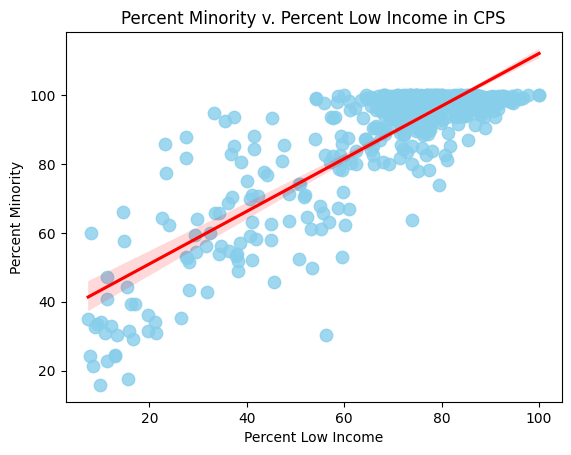

In [101]:
# graphing percent minority students versus the percent low income students across chicago public schools  
sns.regplot(x='Percent Low Income', y='Percent Minority', data=merged_df, scatter_kws={'color': 'skyblue', 's': 80}, line_kws={"color": "red"})
plt.title('Percent Minority v. Percent Low Income in CPS')

# finding the correlation
merged_df['Percent Low Income'].corr(merged_df['Percent Minority'])

np.float64(0.1288283713298702)

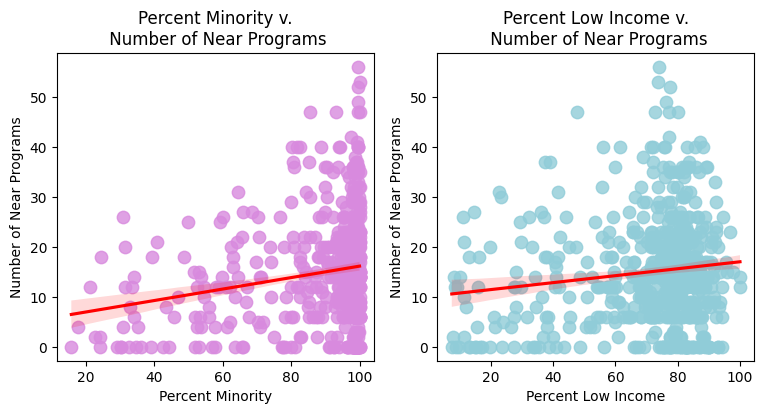

In [102]:
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# plotting percent asian against number of near programs
sns.regplot(x='Percent Minority', y='Number of Near Programs', data=merged_df, scatter_kws={'color': '#D88ADE', 's': 80}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title('Percent Minority v.\n Number of Near Programs')

# plotting percent native american against number of near programs
sns.regplot(x='Percent Low Income', y='Number of Near Programs', data=merged_df, scatter_kws={'color': '#90CCD8', 's': 80}, line_kws={"color": "red"}, ax=axes[1])
axes[1].set_title('Percent Low Income v.\n Number of Near Programs')

# finding correlations for later usage
merged_df['Percent Minority'].corr(merged_df['Number of Near Programs'])
merged_df['Percent Low Income'].corr(merged_df['Number of Near Programs'])

np.float64(0.25601705755427584)

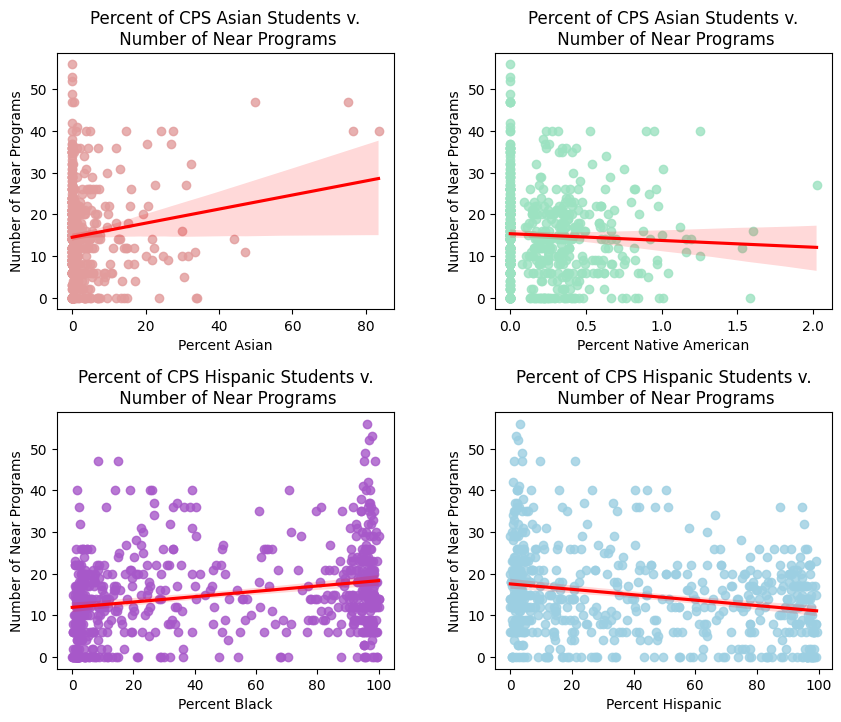

In [103]:
# creating subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# plotting percent asian against number of near programs
sns.regplot(x='Percent Asian', y='Number of Near Programs', data=merged_df, scatter_kws={'color': '#E29C9C'}, line_kws={"color": "red"}, ax=axes[0, 0])
axes[0, 0].set_title('Percent of CPS Asian Students v.\n Number of Near Programs')

# plotting percent native american against number of near programs
sns.regplot(x='Percent Native American', y='Number of Near Programs', data=merged_df, scatter_kws={'color': '#9CE2C1'}, line_kws={"color": "red"}, ax=axes[0, 1])
axes[0, 1].set_title('Percent of CPS Asian Students v.\n Number of Near Programs')

# plotting percent black against number of near programs
sns.regplot(x='Percent Black', y='Number of Near Programs', data=merged_df, scatter_kws={'color': '#A758C9'}, line_kws={"color": "red"}, ax=axes[1, 0])
axes[1, 0].set_title('Percent of CPS Hispanic Students v.\n Number of Near Programs')

# plotting percent hispanic against number of near programs
sns.regplot(x='Percent Hispanic', y='Number of Near Programs', data=merged_df, scatter_kws={'color': '#9CCFE2'}, line_kws={"color": "red"}, ax=axes[1, 1])
axes[1, 1].set_title('Percent of CPS Hispanic Students v.\n Number of Near Programs')

# adjusting to fix readability
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# finding correlations for later usage 
merged_df['Percent Asian'].corr(merged_df['Number of Near Programs'])
merged_df['Percent Native American'].corr(merged_df['Number of Near Programs'])
merged_df['Percent Hispanic'].corr(merged_df['Number of Near Programs'])
merged_df['Percent Black'].corr(merged_df['Number of Near Programs'])

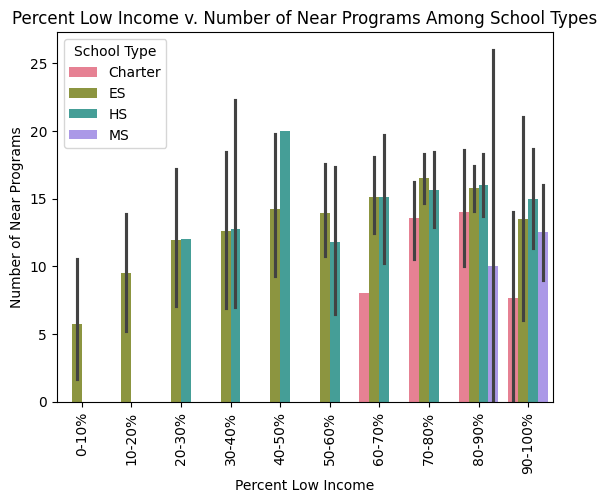

In [104]:
# creating a new column with binned data
percent_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
percent_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
merged_df['Binned Percent Low Income'] = pd.cut(merged_df['Percent Low Income'], bins=percent_bins, labels=percent_labels, right=False)

# graphing percent low income and number of near programs hued by school type 
sns.barplot(x='Binned Percent Low Income', y='Number of Near Programs', data=merged_df, hue='School Type', palette='husl')
plt.xlabel('Percent Low Income')
plt.title('Percent Low Income v. Number of Near Programs Among School Types')
plt.tick_params(axis='x', rotation=90)

np.float64(-0.029824001944322977)

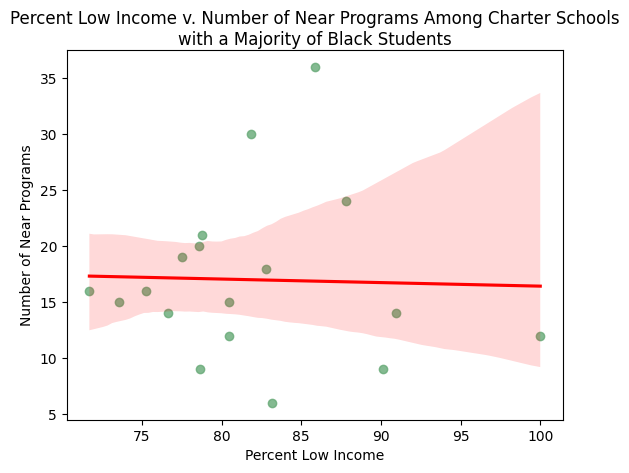

In [105]:
# subsetting the data based on school type 
high_schools = merged_df[merged_df['School Type']=='HS']
middle_schools = merged_df[merged_df['School Type']=='MS']
elementary_schools = merged_df[merged_df['School Type']=='ES']
charter_schools = merged_df[merged_df['School Type']=='Charter']

# plotting percent low income versus number of near programs among majority black charter schools
charter_black = charter_schools[charter_schools['Majority Race']=='Percent Black']
sns.regplot(x='Percent Low Income', y='Number of Near Programs', data=charter_black, scatter_kws={'color': '#66A976'}, line_kws={"color": "red"})
plt.title('Percent Low Income v. Number of Near Programs Among Charter Schools with a Majority of Black Students', wrap=True)

# finding the correlation
charter_black['Percent Low Income'].corr(charter_black['Number of Near Programs'])

np.float64(-0.03311247235264405)

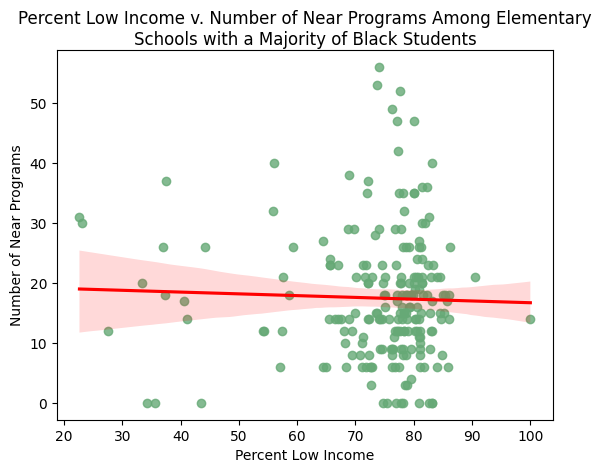

In [106]:
# plotting percent low income versus number of near programs among majority black elementary schools
elementary_black = elementary_schools[elementary_schools['Majority Race']=='Percent Black']
sns.regplot(x='Percent Low Income', y='Number of Near Programs', data=elementary_black, scatter_kws={'color': '#66A976'}, line_kws={"color": "red"})
plt.title('Percent Low Income v. Number of Near Programs Among Elementary Schools with a Majority of Black Students', wrap=True)

# finding the correlation
elementary_black['Percent Low Income'].corr(elementary_black['Number of Near Programs'])

np.float64(-0.047624063393703155)

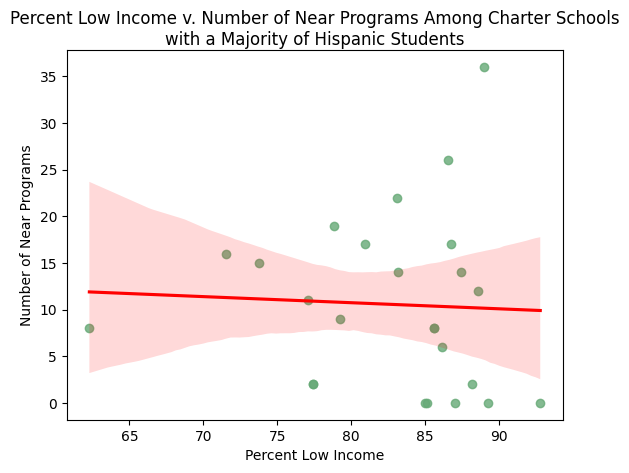

In [107]:
# plotting percent low income versus number of near programs among majority hispanic charter schools
charter_hispanic = charter_schools[charter_schools['Majority Race']=='Percent Hispanic']
sns.regplot(x='Percent Low Income', y='Number of Near Programs', data=charter_hispanic, scatter_kws={'color': '#66A976'}, line_kws={"color": "red"})
plt.title('Percent Low Income v. Number of Near Programs Among Charter Schools with a Majority of Hispanic Students', wrap=True)

# finding the correlation
charter_hispanic['Percent Low Income'].corr(charter_hispanic['Number of Near Programs'])

np.float64(-0.16625706802547027)

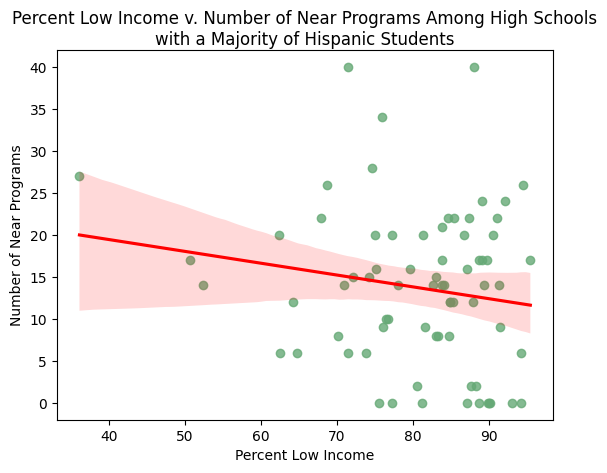

In [108]:
# plotting percent low income versus number of near programs among majority hispanic high schools
hs_hispanic = high_schools[high_schools['Majority Race']=='Percent Hispanic']
sns.regplot(x='Percent Low Income', y='Number of Near Programs', data=hs_hispanic, scatter_kws={'color': '#66A976'}, line_kws={"color": "red"})
plt.title('Percent Low Income v. Number of Near Programs Among High Schools with a Majority of Hispanic Students', wrap=True)

# finding the correlation
hs_hispanic['Percent Low Income'].corr(hs_hispanic['Number of Near Programs'])

Text(0, 0.5, '')

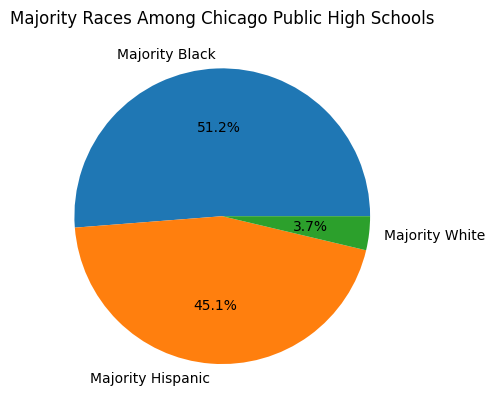

In [109]:
# counting the number of majority race values in order to make a pie chart in the next step
count = high_schools['Majority Race'].value_counts()

# creating the pie chart
labels=['Majority Black', 'Majority Hispanic', 'Majority White']
count.plot(kind='pie', labels=labels, autopct='%1.1f%%')
plt.title('Majority Races Among Chicago Public High Schools')
plt.ylabel('')

Text(0.5, 1.0, 'Percent of CPS White Students v.\n Number of Near Programs')

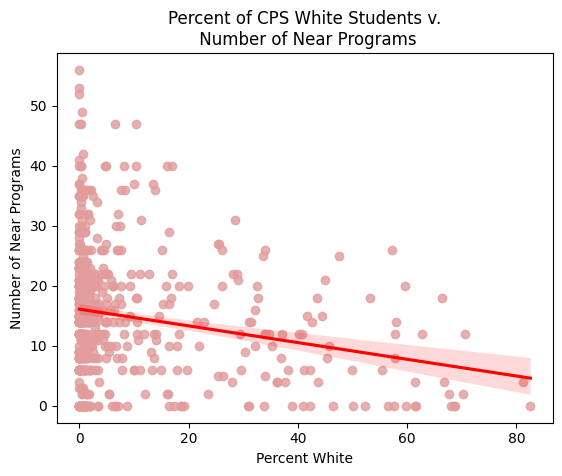

In [110]:
sns.regplot(x='Percent White', y='Number of Near Programs', data=merged_df, scatter_kws={'color': '#E29C9C'}, line_kws={"color": "red"})
plt.title('Percent of CPS White Students v.\n Number of Near Programs')

### Analysis 2
*By Alexa Núñez Magaña*

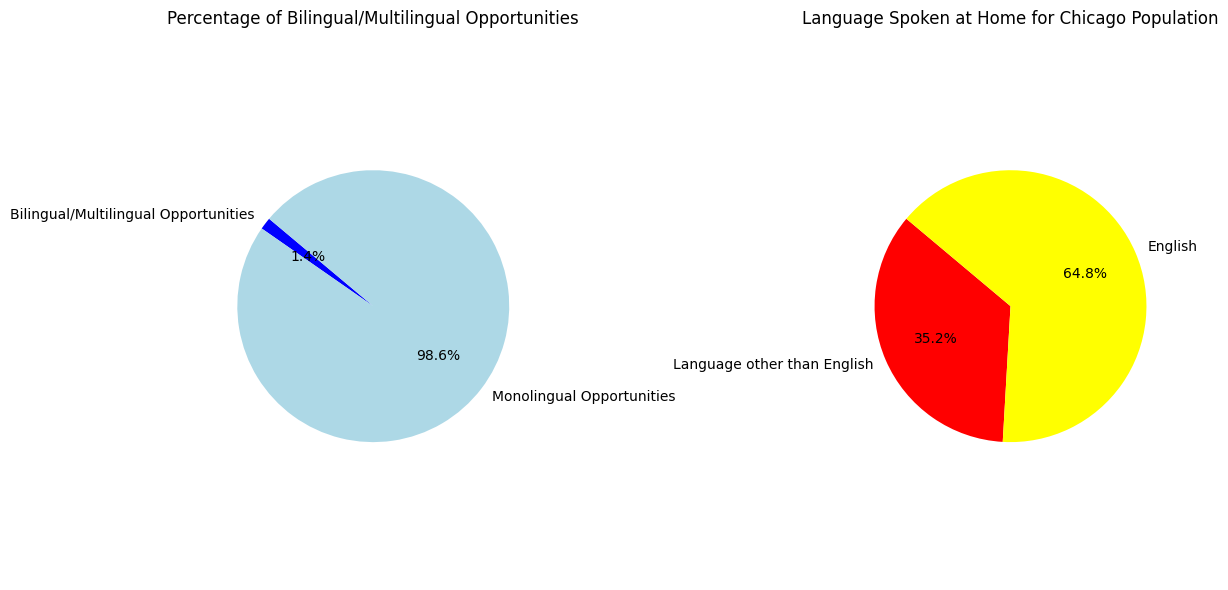

In [111]:
monolingual_op = mcmf_no_duplicates.shape[0] - bilingual_opportunities.shape[0]

# Creating a figure with two pie charts

labels_op = ['Bilingual/Multilingual Opportunities', 'Monolingual Opportunities']
labels_census = ['Language other than English', 'English']

sizes_op = [bilingual_opportunities.shape[0], monolingual_op]
sizes_census = [35.2, 64.8] # Proportion gotten from the US Census not a dataset

colors_op = ['blue', 'lightblue']
colors_census = ['red', 'yellow']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot the first pie chart
axes[0].pie(sizes_op, labels = labels_op, colors= colors_op, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  
axes[0].set_title('Percentage of Bilingual/Multilingual Opportunities')

# Plot the second pie chart
axes[1].pie(sizes_census, labels = labels_census, colors = colors_census, autopct='%1.1f%%', startangle=140)
axes[1].axis('equal') 
axes[1].set_title('Language Spoken at Home for Chicago Population')
plt.tight_layout()  
plt.show()

([<matplotlib.axis.XTick at 0x13d3dc0b0>,
 [Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023'),
  Text(2024, 0, '2024')])

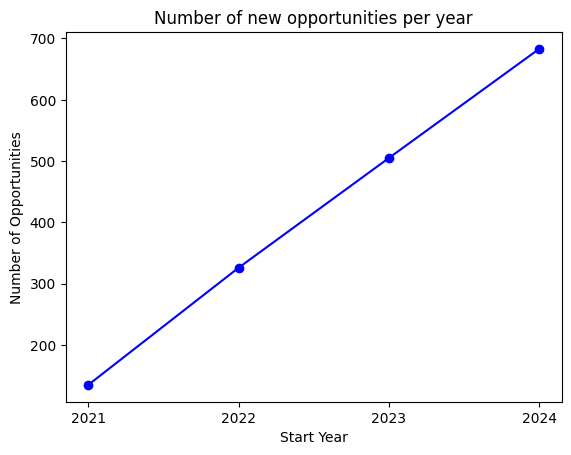

In [112]:
#Getting the Start date in datetime format.
bilingual_opportunities['Start Date'] = pd.to_datetime(bilingual_opportunities['Start Date'])
bilingual_opportunities['Start Year'] = bilingual_opportunities['Start Date'].dt.year

bilingual_opportunities['End Date'] = pd.to_datetime(bilingual_opportunities['End Date'])
bilingual_opportunities['End Year'] = bilingual_opportunities['End Date'].dt.year


# Creating a line plot with the number of bilingual opportunities starting every year.
event_per_year = bilingual_opportunities['Start Year'].value_counts().sort_index()
event_per_year.plot(kind='line', marker='o', color='b')
years = event_per_year.index
plt.ylabel('Number of Opportunities')
plt.title('Number of new opportunities per year')
plt.xticks(years)

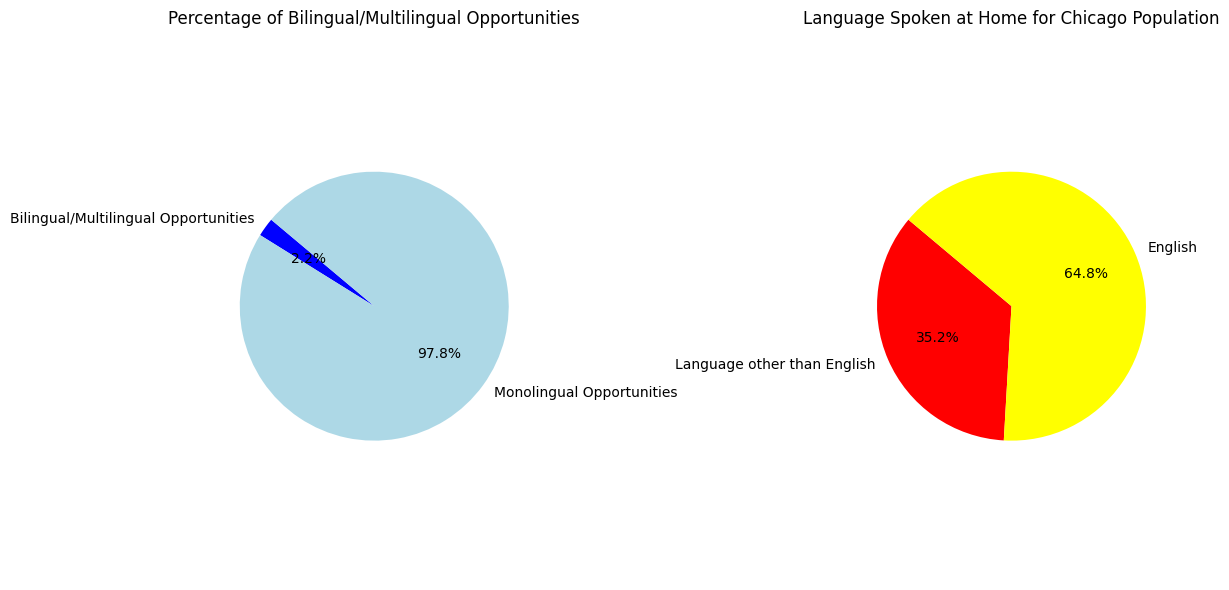

In [113]:
# Getting Start date in datetime format
mcmf_no_duplicates['Start Date'] = pd.to_datetime(mcmf_no_duplicates['Start Date'])
mcmf_no_duplicates['Start Year'] = mcmf_no_duplicates['Start Date'].dt.year

monolingual_op = mcmf_no_duplicates[mcmf_no_duplicates['Start Year'] == 2024].shape[0] - bilingual_opportunities[bilingual_opportunities['Start Year'] == 2024].shape[0]

# Creating a figure with two pie charts. 

labels_op = ['Bilingual/Multilingual Opportunities', 'Monolingual Opportunities']
labels_census = ['Language other than English', 'English']

sizes_op = [bilingual_opportunities[bilingual_opportunities['Start Year'] == 2024].shape[0], monolingual_op]
sizes_census = [35.2, 64.8]

colors_op = ['blue', 'lightblue']
colors_census = ['red', 'yellow']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot the first pie chart
axes[0].pie(sizes_op, labels = labels_op, colors= colors_op, autopct='%1.1f%%', startangle=140)
axes[0].axis('equal')  
axes[0].set_title('Percentage of Bilingual/Multilingual Opportunities')

# Plot the second pie chart
axes[1].pie(sizes_census, labels = labels_census, colors = colors_census, autopct='%1.1f%%', startangle=140)
axes[1].axis('equal') 
axes[1].set_title('Language Spoken at Home for Chicago Population')

plt.tight_layout()  
plt.show()

In [114]:
# A list of language according to the most spoken languages in Chicago.
languages = ['Spanish', 'French', 'Chinese', 'Arabic', 'Polish', 'Persian', 'ASL', 'Korean', 'Tagalog', 'Slavic', 'Russian', 'Urdu', 'Hindi', 'Czech', 'Ukranian', 'Slovak']

# Defining a function that finds and returns the languages of and event. If no languages are found then 'Unspecified' is returned.
def op_languages(description):
    found = [lang for lang in languages if lang.lower() in description.lower()]
    return ', '.join(found) if found else 'Unspecified'

# Applying the function to the 'description' column to create an 'opportunity language' column
bilingual_opportunities['opportunity language'] = bilingual_opportunities['Description'].apply(op_languages)

In [115]:
# Reading the Chicago language dataset and only including the columns relevant to my analysis.
chicago = gpd.read_file("Chicago_2020.shp")
chicago_info = chicago.loc[:, ['community', 'geometry', 'TOT_POP', 'LING_ISO', 'ENGLISH', 'SPANISH', 'SLAVIC', 
                               'CHINESE', 'TAGALOG', 'ARABIC', 'KOREAN', 'OTHER_EURO']]

# Creating a column that includes the number of non-English speakers whose language is not specified. 
chicago_info['OTHER_UNSPEC'] = chicago_info['TOT_POP'] - chicago_info.iloc[:, 4:].sum(axis = 1)

# Creating a column that includes the number of non-English speakers per neighborhood.
chicago_info['NOT_ENGLISH'] = chicago_info['TOT_POP'] - chicago_info['ENGLISH']

# Creating a column that includes the proportion of non-English speaker per neighborhood.
chicago_info['NOT_ENGLISH_PROP'] = ((chicago_info['NOT_ENGLISH'])/chicago_info['TOT_POP'])*100

In [116]:
# Excluding online events since they are irrelevant for this part of the analysis.
bilingual_person_ops = bilingual_opportunities[bilingual_opportunities['Meeting Type'] != 'online']

# Getting the longitude and latitude in Point format.
geometry = gpd.points_from_xy(bilingual_person_ops['Longitude'], bilingual_person_ops['Latitude'])

# Creating a GeoDataFrame containing the information of the in person bilingual programs.
geo_bilingual = gpd.GeoDataFrame(bilingual_person_ops, geometry= geometry)

# Setting the Coordinate Reference System to the Coordinate Reference System of the chicago dataset
geo_bilingual = geo_bilingual.set_crs(chicago_info.crs, allow_override=True)

# Joining the two datasets.
gdf = gpd.sjoin(geo_bilingual, chicago_info, how="left", predicate="within")

# Overriding the data in the Geographic Cluster Name column with that of the 'community' column so that the neighborhood's names are the same.
bilingual_person_ops['Geographic Cluster Name'] = gdf['community']
geo_bilingual = gpd.GeoDataFrame(bilingual_person_ops, geometry= geometry)

# Grouping the event based on their start year.
yearly_counts = bilingual_person_ops.groupby(['Geographic Cluster Name', 'Start Year']).size().reset_index(name = 'oportunities')

# Getting the average number of opportunitites that start every year per neighborhood.
ops_per_area = yearly_counts.groupby('Geographic Cluster Name')['oportunities'].mean().reset_index()

# Merging the chicago dataset with the mean opportunities per neighborhoods each year. 
ops_per_area.rename(columns={'Geographic Cluster Name': 'community'}, inplace=True)
chicago_info = pd.merge(chicago_info, ops_per_area, on='community', how='left')
chicago_info['oportunities'].fillna(0, inplace=True)

/var/folders/87/c47mf2zd1ts1w4gh05bwhwbc0000gn/T/ipykernel_12723/2585057721.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bilingual_person_ops['Geographic Cluster Name'] = gdf['community']
/var/folders/87/c47mf2zd1ts1w4gh05bwhwbc0000gn/T/ipykernel_12723/2585057721.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation

In [117]:
# Finding the most offered language other than English of opportunities in each neighborhood.

language_counts = bilingual_person_ops.groupby(['Geographic Cluster Name', 'opportunity language']).size()
most_frequent_language_idx = language_counts.groupby('Geographic Cluster Name').idxmax()
most_frequent_language = language_counts.loc[most_frequent_language_idx].reset_index()[['Geographic Cluster Name', 'opportunity language']]

# Merging the chicago dataset with the most offered event language other than English.

most_frequent_language.rename(columns = {'Geographic Cluster Name': 'community'}, inplace=True)
chicago_info = pd.merge(chicago_info, most_frequent_language, on='community', how='left')
chicago_info['opportunity language'].fillna('No oportunities', inplace=True)

/var/folders/87/c47mf2zd1ts1w4gh05bwhwbc0000gn/T/ipykernel_12723/598641199.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chicago_info['opportunity language'].fillna('No oportunities', inplace=True)


In [118]:
# Language columns of the Chicago language dataset.
language_columns = ['SPANISH', 'SLAVIC', 'CHINESE', 'TAGALOG', 'ARABIC', 'KOREAN', 'OTHER_EURO']

# Defining a function that finds the most spoken non-English language and the proportion of speakers in each neighborhood.
def most_spoken_language(area):
    # Filters out rows where all language values are zero
    language_speakers = area[language_columns]
    
    most_spoken_language = language_speakers.idxmax()  
    max_value = language_speakers.max()  
    
    # Calculating the percentage of the most spoken language.
    percentage = (max_value / area['TOT_POP']) * 100
    
    return f"{most_spoken_language}: {int(percentage)}%"

# Applies the function to each row in the dataframe.
chicago_info['most spoken language other than English'] = chicago_info.apply(most_spoken_language, axis=1)

In [119]:
# Creating an interactive map with the information found above

m = chicago_info.explore(
    column="NOT_ENGLISH_PROP", 
    scheme="naturalbreaks",  
    legend=True,  
    k=10,  
    tooltip= ['community','most spoken language other than English', 'oportunities', 'opportunity language'],  # hide tooltip
    legend_kwds=dict(colorbar=False),  
    name="chicago",  
)
m

In [120]:
# Finding the proportion of the offered languages in bilingual opportunities.
language_counts = bilingual_opportunities['opportunity language'].value_counts()
language_proportions = language_counts / bilingual_oportunities.shape[0]


# Finding the proportion of speakers of each language in Chicago. 
non_english_proportions = chicago_info.loc[:, ['NOT_ENGLISH','SPANISH', 'SLAVIC', 'CHINESE', 'TAGALOG', 'ARABIC', 'KOREAN', 'OTHER_EURO',
                                               'OTHER_UNSPEC']]

non_english_proportions = non_english_proportions.sum(axis = 0)
proportions = non_english_proportions.drop('NOT_ENGLISH') / non_english_proportions['NOT_ENGLISH']

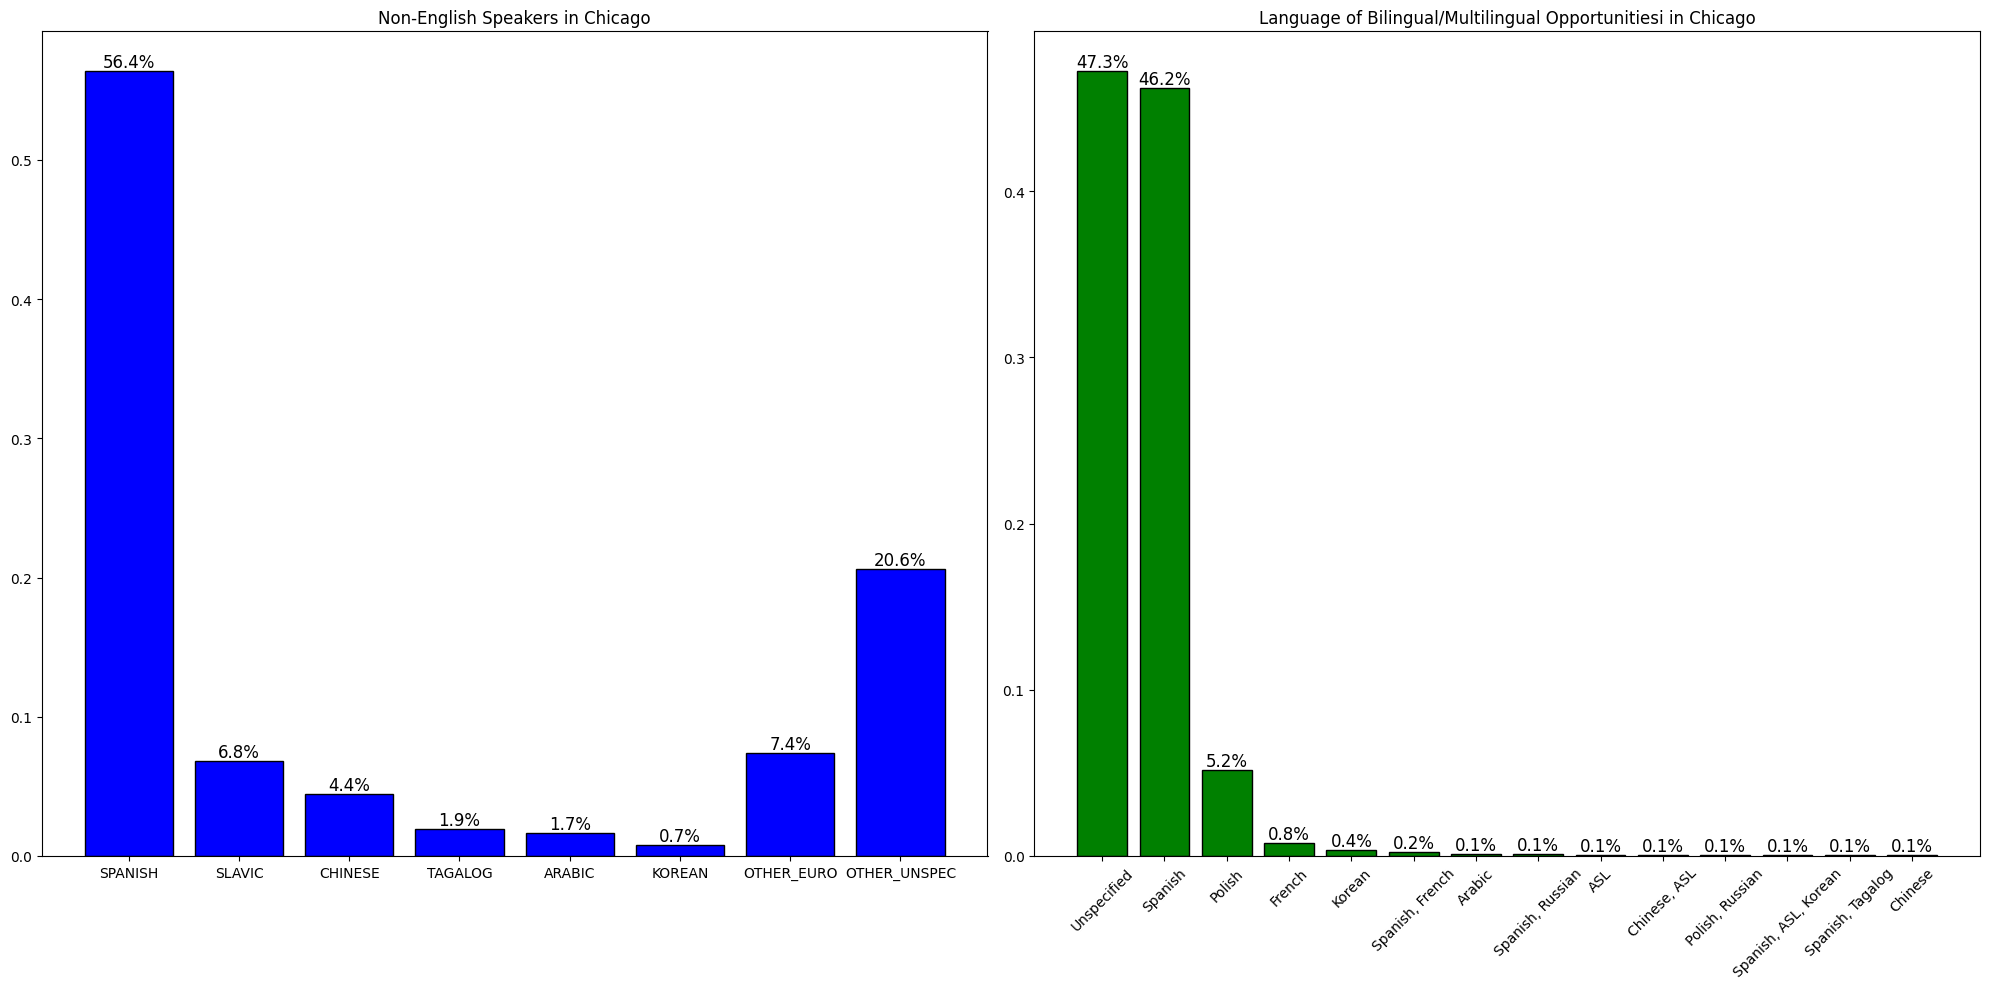

In [121]:
# Creating two barplots that show the distributions of spoken non-English languages in Chicago and the distribution of the languages offered in bilingual opportunities in Chicago.

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

bars = axes[0].bar(proportions.index, proportions, color='blue', edgecolor = 'black')
axes[0].set_title('Non-English Speakers in Chicago')
axes[0].bar_label(bars, labels=[f'{value:.1%}' for value in proportions], fontsize=12)

bars1 = axes[1].bar(language_proportions.index, language_proportions, color='green', edgecolor='black')
axes[1].bar_label(bars1, labels=[f'{value:.1%}' for value in language_proportions], fontsize=12)
axes[1].set_title('Language of Bilingual/Multilingual Opportunitiesi in Chicago')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

### Analysis 3
*By Danny Ramirez*

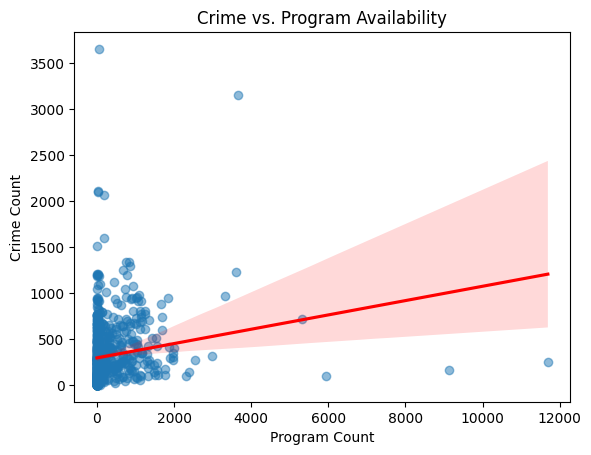

Correlation: 0.17139145663437833
Coefficient: 0.07790756999264808
Standard Error: 0.016484965299981814
T-statistic: 4.725977190424175
P-value: 2.7426170534639027e-06


In [122]:
#Generate scatterplot
sns.regplot(
    x='Program Count',
    y='Crime Count',
    data=combined_data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=95
)
plt.xlabel('Program Count')
plt.ylabel('Crime Count')
plt.title('Crime vs. Program Availability')
plt.show()

#Prepare data
X = combined_data['Program Count'].values.reshape(-1, 1)
y = combined_data['Crime Count'].values
model = LinearRegression()
model.fit(X, y)

#Get predictions and residuals
y_prediction = model.predict(X)
residuals = y - y_prediction

#Calculate standard error of beta 1 hat
n = len(y)  #Number of observations
k = 1  #Number of predictors (linear regression so =1)
ssr = np.sum(residuals**2)  #Sum of squares regression
se = np.sqrt(ssr / (n - k - 1)) / np.sqrt(np.sum((X - np.mean(X))**2))  #Standard error of beta 1 hat

#Calculate t-statistic
beta_one_hat = model.coef_[0]
t_stat = beta_one_hat / se

#Calculate p-value (two-tailed) and correlation
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n - k - 1))
corr = combined_data['Crime Count'].corr(combined_data['Program Count'])

print(f"Correlation: {corr}")
print(f"Coefficient: {beta_one_hat}")
print(f"Standard Error: {se}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

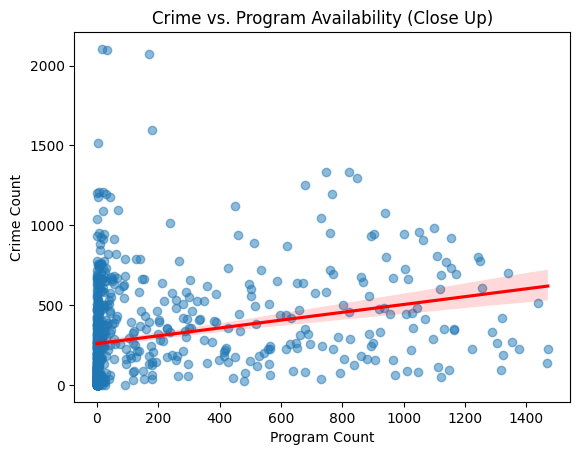

In [123]:
#Capping crime and programs to get a closeup on the graph
crime_threshold = 3000  #Keep only cells with <= 3000 crimes
program_threshold = 1500  #Keep only cells with <= 1500 programs

# Filter data
filtered_data = combined_data[
    (combined_data['Crime Count'] <= crime_threshold) &
    (combined_data['Program Count'] <= program_threshold)
]

#Generate scatterplot
sns.regplot(
    x='Program Count',
    y='Crime Count',
    data=filtered_data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=95
)
plt.xlabel('Program Count')
plt.ylabel('Crime Count')
plt.title('Crime vs. Program Availability (Close Up)')
plt.show()

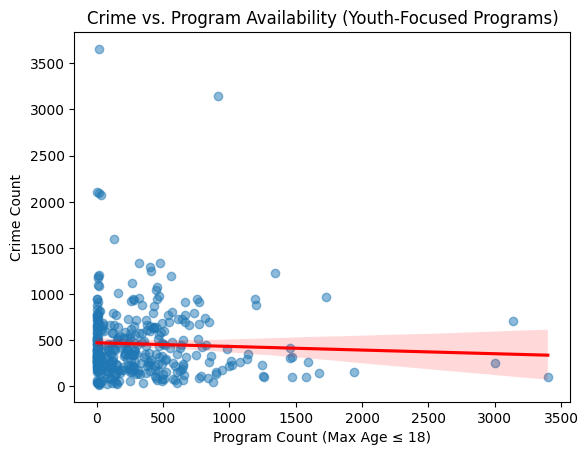

Correlation: -0.044430847998046225
Coefficient: -0.039523322116876
Standard Error: 0.04638811375581901
T-statistic: -0.852013994897952
P-value: 0.3947619573520682


In [124]:
#Keeping only program counts that are less than 18
youth_programs = programs_df[programs_df['Max Age'] <= 18]

#Recalculating program counts by location and then merging with crime data
youth_program_counts = youth_programs.groupby('Grid').size().reset_index(name='Program Count')
filtered_youth_data = pd.merge(crime_grid_counts, youth_program_counts, on='Grid', how='inner')

#Generate scatterplot
sns.regplot(
    x='Program Count',
    y='Crime Count',
    data=filtered_youth_data,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ci=95
)
plt.xlabel('Program Count (Max Age ≤ 18)')
plt.ylabel('Crime Count')
plt.title('Crime vs. Program Availability (Youth-Focused Programs)')
plt.show()

#Prepare the filtered data
X_filtered = filtered_youth_data['Program Count'].values.reshape(-1, 1)
y_filtered = filtered_youth_data['Crime Count'].values
youth_model = LinearRegression()
youth_model.fit(X_filtered, y_filtered)

#Get predictions and residuals
y_pred_youth = youth_model.predict(X_filtered)
residuals_youth = y_filtered - y_pred_youth

#Calculate standard error of the coefficient
n_youth = len(y_filtered)
k_youth = 1
ssr_youth = np.sum(residuals_youth**2)
se_youth = np.sqrt(ssr_youth / (n_youth - k_youth - 1)) / np.sqrt(np.sum((X_filtered - np.mean(X_filtered))**2))

#Calculate t-statistic
coef_youth = youth_model.coef_[0]
t_stat_youth = coef_youth / se_youth

#Calculate p-value (two-tailed) and correlation
p_value_youth = 2 * (1 - t.cdf(abs(t_stat_youth), df=n_youth - k_youth - 1))
corr_youth = filtered_youth_data['Crime Count'].corr(filtered_youth_data['Program Count'])

print(f"Correlation: {corr_youth}")
print(f"Coefficient: {coef_youth}")
print(f"Standard Error: {se_youth}")
print(f"T-statistic: {t_stat_youth}")
print(f"P-value: {p_value_youth}")

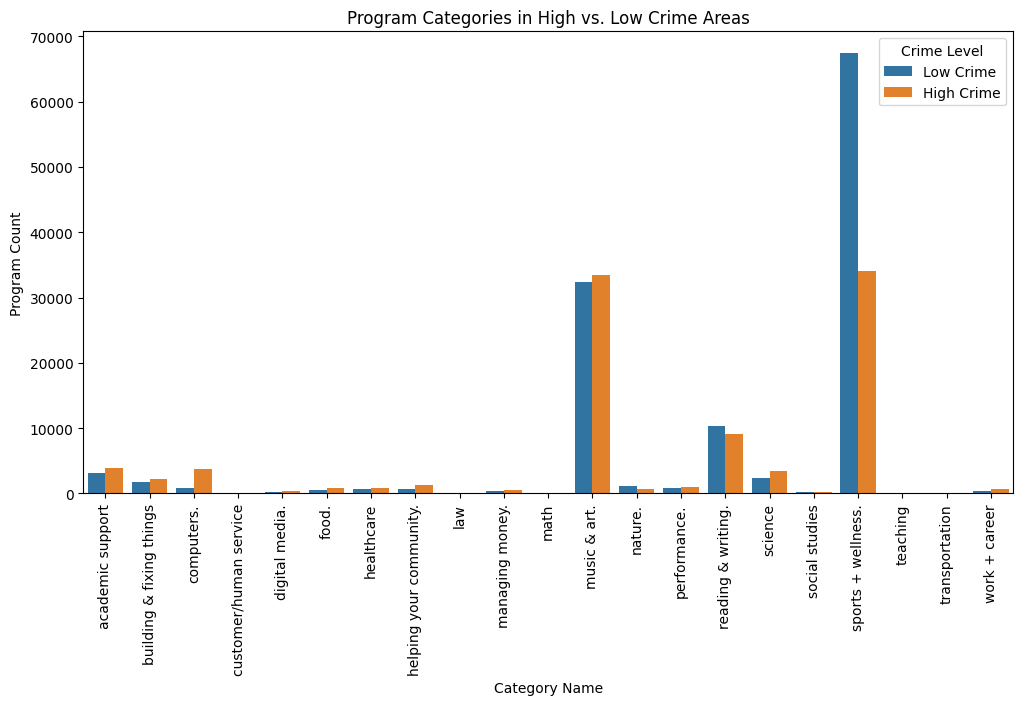

In [125]:
#Standardize program category column
programs_df['Category Name'] = programs_df['Category Name'].str.strip().str.lower()
program_categories = programs_df.groupby(['Grid', 'Category Name']).size().reset_index(name='Program Count')

#Group crimes by Grid cell and then merge with program categories
crime_counts = crime_df.groupby('Grid').size().reset_index(name='Crime Count')
crime_program_data = pd.merge(crime_counts, program_categories, on='Grid', how='inner')

#Categorize areas as high or low crime and aggregate program counts by category and crime
crime_program_data['Crime Level'] = pd.qcut(crime_program_data['Crime Count'], q=2, labels=['Low Crime', 'High Crime'])
category_crime = crime_program_data.groupby(['Crime Level', 'Category Name'], observed = False)['Program Count'].sum().reset_index()

#Generate the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_crime, x='Category Name', y='Program Count', hue='Crime Level')
plt.xticks(rotation=90)
plt.title('Program Categories in High vs. Low Crime Areas')
plt.ylabel('Program Count')
plt.show()